In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

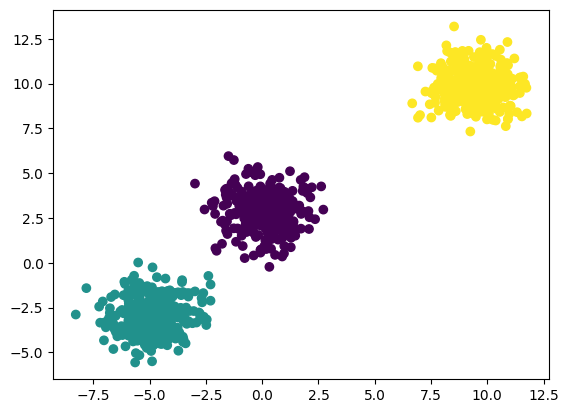

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans

In [9]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[1339.9999999999986,
 250.05405888474834,
 42.46949356692431,
 37.30883609437195,
 32.07212386463998,
 28.736678482787795,
 23.59379550047461,
 22.628556412782626,
 19.77735544932701,
 17.431821817341984]

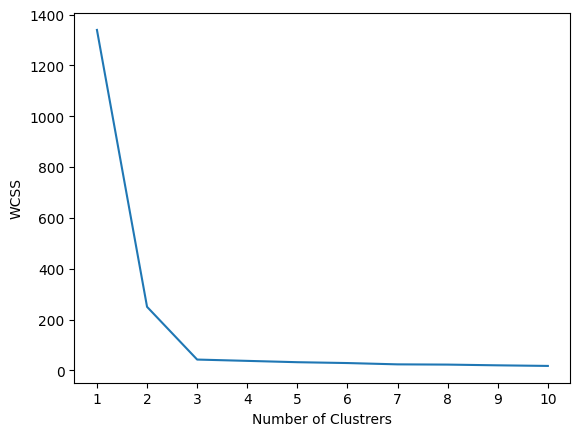

In [11]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)[:50]

array([0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 0], dtype=int32)

In [19]:
y_pred=kmeans.predict(X_test_scaled)

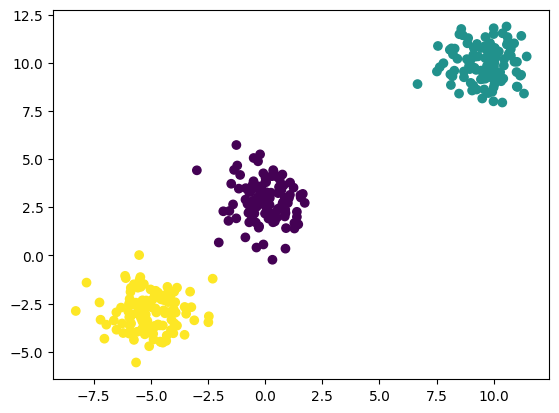

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [21]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
from kneed import KneeLocator

In [24]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [25]:
kl.elbow

np.int64(3)

In [26]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [28]:
silhouette_coefficients

[np.float64(0.7369326262701484),
 np.float64(0.7925678402049267),
 np.float64(0.6453475397369387),
 np.float64(0.5062650825386428),
 np.float64(0.33300663182292756),
 np.float64(0.3446437478725719),
 np.float64(0.3283392577251528),
 np.float64(0.34884188144725436),
 np.float64(0.3427481198341433)]

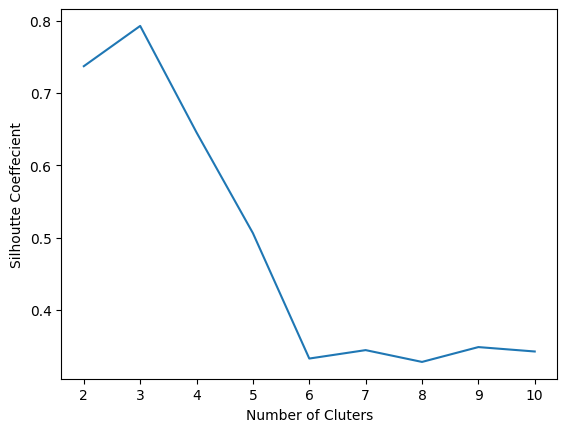

In [29]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()